<a href="https://colab.research.google.com/github/baecci/ML-CBNU25/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# 1. MNIST 데이터 로드
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
x, y = mnist.data, mnist.target.astype(int)  # MNIST 이미지, 레이블 데이터

# 2. 데이터 정규화
x = x / 255.0

# 3. 학습용 / 테스트용 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=10000, test_size=5000, random_state=42, stratify=y) # 난수 고정

In [45]:
# 4. SVM 모델로 학습 및 예측 실행
#svm = SVC(kernel='linear')
#svm = SVC(kernel='poly', degree=3, gamma='scale')
svm = SVC(kernel='sigmoid', gamma='scale')
#svm = SVC(kernel='rbf', gamma='scale')

svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

In [46]:
# 6. 평가
print("\nSVM Result:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


SVM Result:
Accuracy: 0.8148
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       493
           1       0.88      0.95      0.92       563
           2       0.80      0.80      0.80       499
           3       0.82      0.75      0.78       510
           4       0.82      0.87      0.85       487
           5       0.65      0.67      0.66       451
           6       0.88      0.85      0.86       491
           7       0.89      0.88      0.88       521
           8       0.76      0.70      0.73       488
           9       0.80      0.78      0.79       497

    accuracy                           0.81      5000
   macro avg       0.81      0.81      0.81      5000
weighted avg       0.81      0.81      0.81      5000



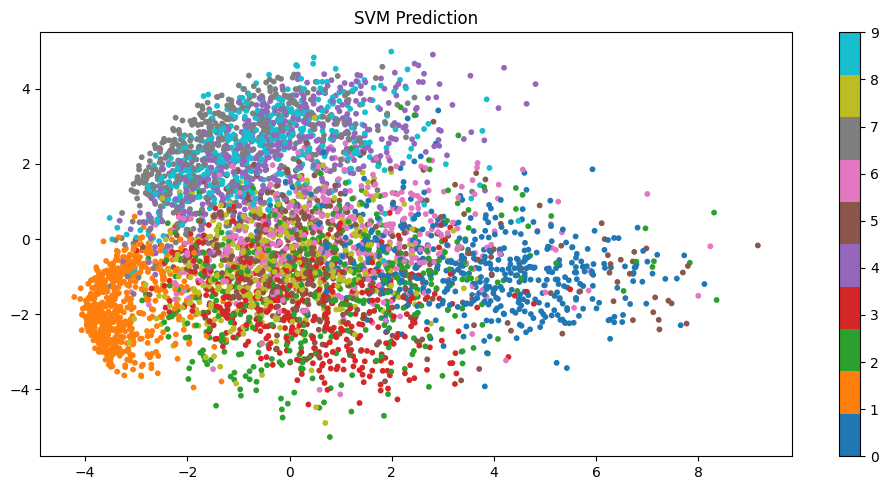

In [47]:
# 7. 예측 시각화
pca = PCA(n_components=2)
visualization = pca.fit_transform(x_test)

plt.figure(figsize=(10, 5))
plt.title("SVM Prediction")
plt.scatter(visualization[:, 0], visualization[:, 1], c=y_pred, cmap='tab10', s=10)
plt.colorbar()
plt.tight_layout()
plt.show()